## __Descriptive Statistics__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

## __Numerical Summary__

In [117]:
age = [22, 22, 23, 23, 29, 24, 27, 28, 30]

print(np.sort(age))
print('mean:', np.mean(age))
print('Standard Deviation:', np.std(age, ddof=1))
print('Q1:', np.quantile(age, 0.25, interpolation='linear'))
print('Q2:', np.quantile(age, 0.5))
print('Q3:', np.quantile(age, 0.75, interpolation='linear'))
print('IQR:', np.quantile(age, 0.75) - np.quantile(age, 0.25))
print('100th percentile:', np.quantile(age, 1))

[22 22 23 23 24 27 28 29 30]
mean: 25.333333333333332
Standard Deviation: 3.1622776601683795
Q1: 23.0
Q2: 24.0
Q3: 28.0
IQR: 5.0
100th percentile: 30


In [116]:
ages = pd.Series(age)
ages.describe()

count     8.000000
mean     24.750000
std       2.815772
min      22.000000
25%      22.750000
50%      23.500000
75%      27.250000
max      29.000000
dtype: float64

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
print('mean:', tips['total_bill'].mean())
print('median:', tips['total_bill'].median())
print('Q1:', tips['total_bill'].quantile(0.25))

mean: 19.785942622950824
median: 17.795
Q1: 13.3475


In [9]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [13]:
tips.select_dtypes(exclude=['int64', 'float64']).describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [16]:
tips.select_dtypes(include=['category']).describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [14]:
tips['sex'].mode()

0    Male
Name: sex, dtype: category
Categories (2, object): [Male, Female]

In [23]:
tips['day'].value_counts().to_frame()

,day
Sat,87
Sun,76
Thur,62
Fri,19


In [21]:
tips['day'].value_counts(normalize=True).to_frame()

,day
Sat,0.356557
Sun,0.311475
Thur,0.254098
Fri,0.077869


In [27]:
pd.crosstab(tips['day'], columns='count')

col_0,count
day,
Thur,62
Fri,19
Sat,87
Sun,76


In [32]:
pd.crosstab(tips['day'], columns= 'Average Total Bill', values= tips['total_bill'], aggfunc= np.mean)

col_0,Average Total Bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


In [36]:
pd.crosstab(tips['day'], tips['sex'])

sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [50]:
pd.crosstab(tips['day'], tips['sex'], normalize='index')

sex,Male,Female
day,,
Thur,0.483871,0.516129
Fri,0.526316,0.473684
Sat,0.678161,0.321839
Sun,0.763158,0.236842


## __Graphical Summary__

In [65]:
np.random.seed(24)
set1 = list(np.random.normal(12, 2, 1000))
set2 = list(np.random.normal(5, 2, 1000))

In [66]:
np.mean(set1), np.std(set1, ddof=1), len(set1)

(12.027189146259833, 2.0274179929948626, 1000)

In [67]:
setfull = set1 + set2
setfull[:5]

[14.658424345298373,
 10.459933095990301,
 11.367439280757141,
 10.018379226718078,
 9.858367488759521]

In [68]:
setfull = [round(x,3) for x in setfull]
setfull[:5]

[14.658, 10.46, 11.367, 10.018, 9.858]

## __Normal Distribution__

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


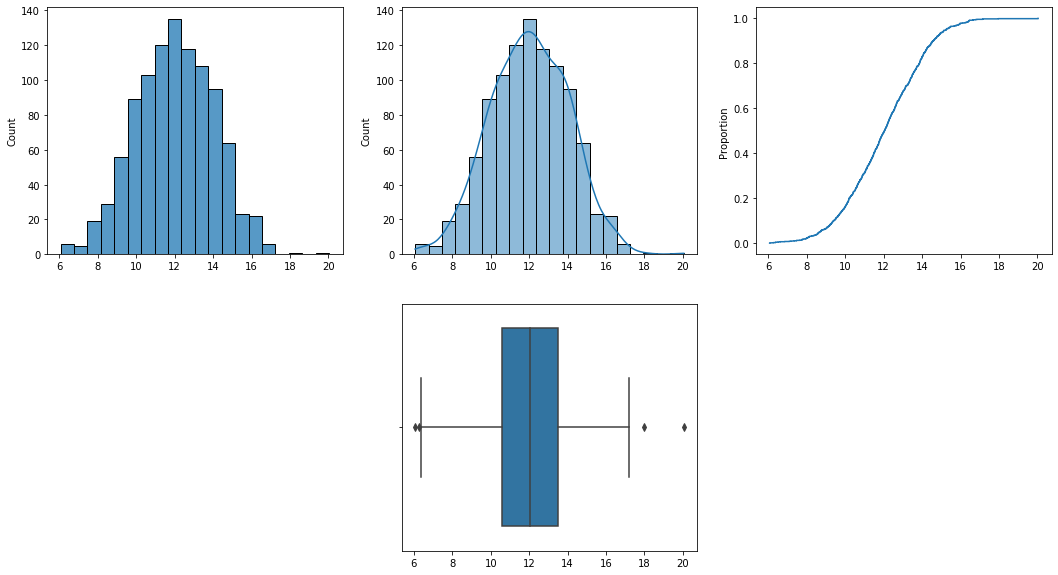

In [103]:
plt.figure(figsize=(18,10))
plt.subplot(231)
sns.histplot(set1, bins=20, kde=False)
plt.subplot(232)
sns.histplot(set1, bins=20, kde=True)
plt.subplot(233)
sns.ecdfplot(set1)
plt.subplot(235)
sns.boxplot(set1)
plt.show()

## __Bimodal__

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


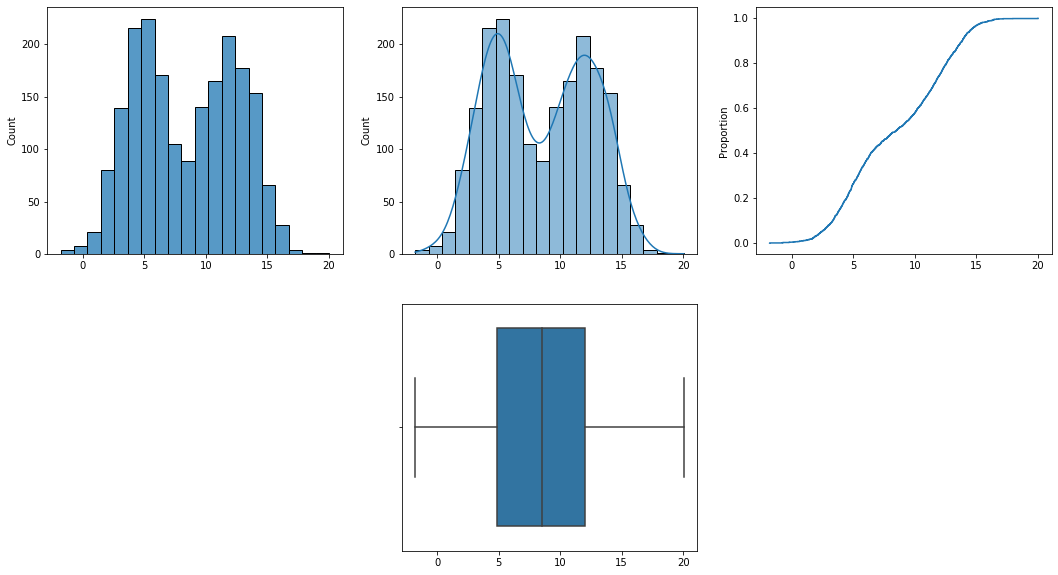

In [105]:
plt.figure(figsize=(18,10))
plt.subplot(231)
sns.histplot(setfull, bins=20, kde=False)
plt.subplot(232)
sns.histplot(setfull, bins=20, kde=True)
plt.subplot(233)
sns.ecdfplot(setfull)
plt.subplot(235)
sns.boxplot(setfull)
plt.show()

## __Skew Right__

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


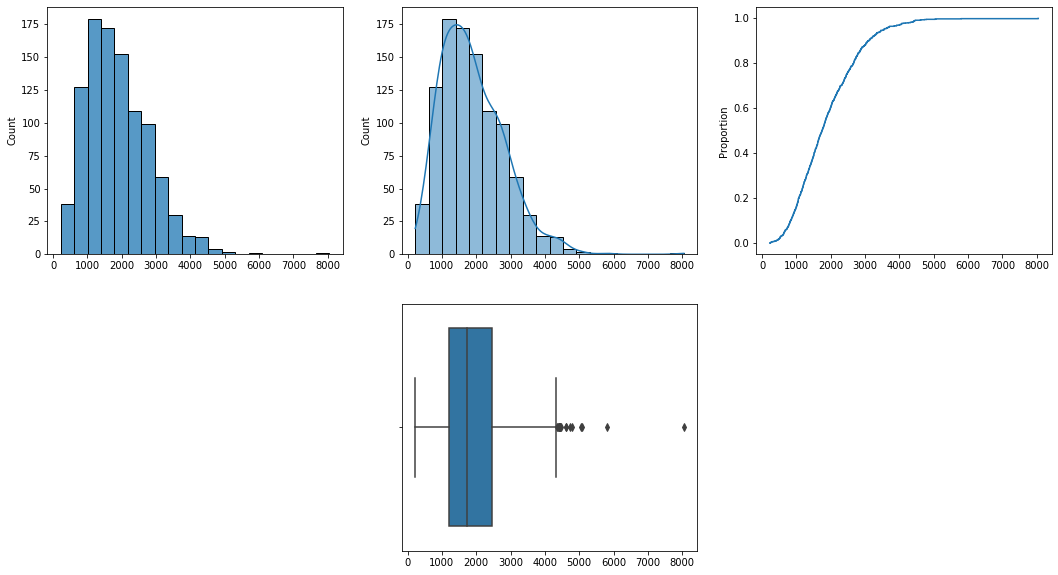

In [107]:
plt.figure(figsize=(18,10))
plt.subplot(231)
sns.histplot([x**3 for x in set1], bins=20, kde=False)
plt.subplot(232)
sns.histplot([x**3 for x in set1], bins=20, kde=True)
plt.subplot(233)
sns.ecdfplot([x**3 for x in set1])
plt.subplot(235)
sns.boxplot([x**3 for x in set1])
plt.show()

## __Skew Left__

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


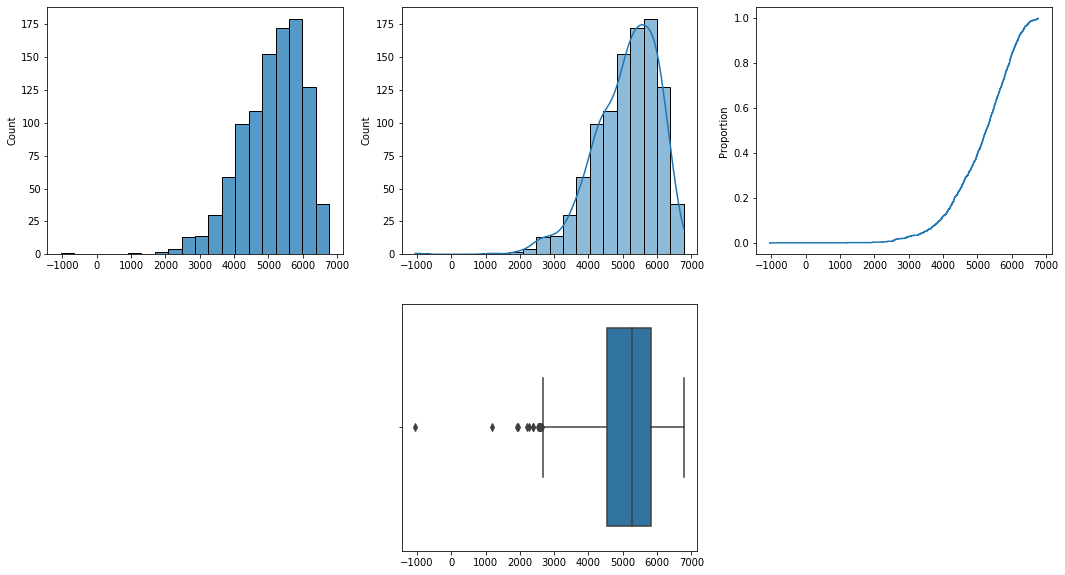

In [108]:
plt.figure(figsize=(18,10))
plt.subplot(231)
sns.histplot([7000-x**3 for x in set1], bins=20, kde=False)
plt.subplot(232)
sns.histplot([7000-x**3 for x in set1], bins=20, kde=True)
plt.subplot(233)
sns.ecdfplot([7000-x**3 for x in set1])
plt.subplot(235)
sns.boxplot([7000-x**3 for x in set1])
plt.show()

## __Uniform__

In [96]:
np.random.seed(24)
set3 = list(np.random.uniform(0,1,1000))
set3[:5]

[0.9600173033359185,
 0.699512049949576,
 0.9998672926238792,
 0.22006729978285178,
 0.361056353964058]

C:\Users\R7891\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


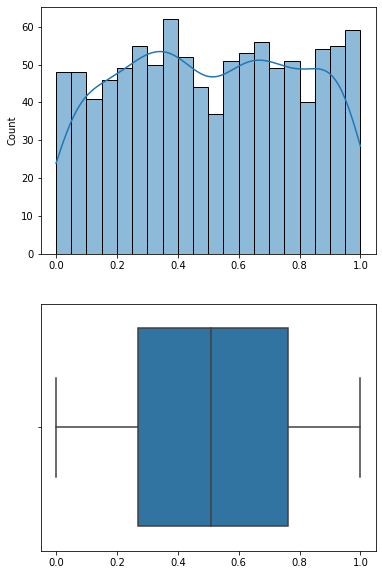

In [110]:
plt.figure(figsize=(6,10))
plt.subplot(211)
sns.histplot(set3, bins=20, kde=True)
plt.subplot(212)
sns.boxplot(set3)
plt.show()

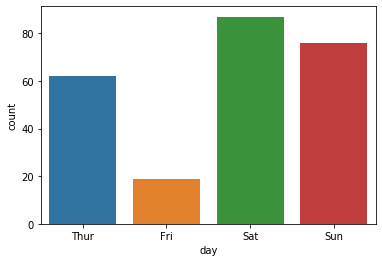

In [111]:
sns.countplot(x = 'day', data=tips)
plt.show()

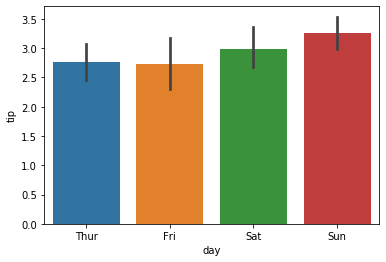

In [112]:
sns.barplot(x='day', y='tip', data=tips)